In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows',500) 
pd.set_option('display.max_columns',500)
pd.set_option('display.width',100000)

In [2]:
churn=pd.read_csv(r'C:\Users\risha\case_study\churn.csv')

In [3]:
pd.options.display.max_rows = 1000
churn.head(1000)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
churn.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [6]:
churn.drop(columns=['customerID'],axis=1,inplace=True)

In [7]:
churn = churn.dropna()

churn['TotalCharges'] = pd.to_numeric(churn['TotalCharges'],errors='coerce')

In [8]:
churn.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [9]:
churn['Churn']=np.where(churn['Churn']=='Yes',1,0)
churn['Partner']=np.where(churn['Partner']=='Yes',1,0)

In [10]:
churn['PhoneService']=np.where(churn['PhoneService']=='Yes',1,0)
churn['InternetService']=np.where(churn['InternetService']=='No',0,1)

In [11]:
churn['Dependents']=np.where(churn['Dependents']=='Yes',1,0)
churn['MultipleLines']=np.where(churn['MultipleLines']=='Yes',1,0)
churn['OnlineSecurity']=np.where(churn['OnlineSecurity']=='Yes',1,0)
churn['OnlineBackup']=np.where(churn['OnlineBackup']=='Yes',1,0)
churn['DeviceProtection']=np.where(churn['DeviceProtection']=='Yes',1,0)
churn['TechSupport']=np.where(churn['TechSupport']=='Yes',1,0)
churn['StreamingTV']=np.where(churn['StreamingTV']=='Yes',1,0)

In [12]:
churn['StreamingMovies']=np.where(churn['StreamingMovies']=='Yes',1,0)
churn['PaperlessBilling']=np.where(churn['PaperlessBilling']=='Yes',1,0)

In [13]:
churn.dtypes

gender               object
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract             object
PaperlessBilling      int32
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

In [14]:
churn.groupby('Contract')['Contract','Churn'].sum()

C:\Users\risha\AppData\Local\Temp/ipykernel_7604/2408671613.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  churn.groupby('Contract')['Contract','Churn'].sum()


,Churn
Contract,
Month-to-month,1655
One year,166
Two year,48


In [15]:
churn.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [16]:
churn.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [17]:
churn_num = churn[churn.select_dtypes(include=[np.number]).columns.tolist()]

In [18]:
churn_dummies=pd.get_dummies(churn[churn.select_dtypes(include=[np.object]).columns.tolist()])

C:\Users\risha\AppData\Local\Temp/ipykernel_7604/2228004837.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  churn_dummies=pd.get_dummies(churn[churn.select_dtypes(include=[np.object]).columns.tolist()])


In [19]:
churn_dummies.head()

,gender_Female,gender_Male,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0,0,0,1,0
1,0,1,0,1,0,0,0,0,1
2,0,1,1,0,0,0,0,0,1
3,0,1,0,1,0,1,0,0,0
4,1,0,1,0,0,0,0,1,0


In [20]:
churn_df=pd.concat([churn_num,churn_dummies],axis=1)

In [21]:
churn_df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,29.85,29.85,0,1,0,1,0,0,0,0,1,0
1,0,0,0,34,1,0,1,1,0,1,0,0,0,0,56.95,1889.50,0,0,1,0,1,0,0,0,0,1
2,0,0,0,2,1,0,1,1,1,0,0,0,0,1,53.85,108.15,1,0,1,1,0,0,0,0,0,1
3,0,0,0,45,0,0,1,1,0,1,1,0,0,0,42.30,1840.75,0,0,1,0,1,0,1,0,0,0
4,0,0,0,2,1,0,1,0,0,0,0,0,0,1,70.70,151.65,1,1,0,1,0,0,0,0,1,0


In [22]:
churn_df.isna().sum()

SeniorCitizen                               0
Partner                                     0
Dependents                                  0
tenure                                      0
PhoneService                                0
MultipleLines                               0
InternetService                             0
OnlineSecurity                              0
OnlineBackup                                0
DeviceProtection                            0
TechSupport                                 0
StreamingTV                                 0
StreamingMovies                             0
PaperlessBilling                            0
MonthlyCharges                              0
TotalCharges                               11
Churn                                       0
gender_Female                               0
gender_Male                                 0
Contract_Month-to-month                     0
Contract_One year                           0
Contract_Two year                 

In [23]:
churn_df.fillna(churn_df.mean(), inplace=True)

In [24]:
churn_df.isna().sum()

SeniorCitizen                              0
Partner                                    0
Dependents                                 0
tenure                                     0
PhoneService                               0
MultipleLines                              0
InternetService                            0
OnlineSecurity                             0
OnlineBackup                               0
DeviceProtection                           0
TechSupport                                0
StreamingTV                                0
StreamingMovies                            0
PaperlessBilling                           0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
gender_Female                              0
gender_Male                                0
Contract_Month-to-month                    0
Contract_One year                          0
Contract_Two year                          0
PaymentMet

C:\Users\risha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalCharges'>

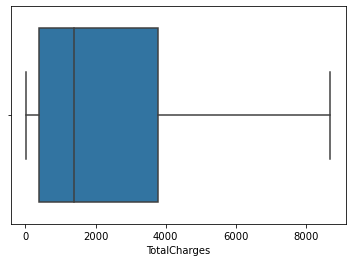

In [25]:
import seaborn as sns
sns.boxplot(churn_df['TotalCharges'])

In [26]:
churn_df.dropna(axis=0,inplace=True)

In [27]:
churn_df.isna().sum()

SeniorCitizen                              0
Partner                                    0
Dependents                                 0
tenure                                     0
PhoneService                               0
MultipleLines                              0
InternetService                            0
OnlineSecurity                             0
OnlineBackup                               0
DeviceProtection                           0
TechSupport                                0
StreamingTV                                0
StreamingMovies                            0
PaperlessBilling                           0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
gender_Female                              0
gender_Male                                0
Contract_Month-to-month                    0
Contract_One year                          0
Contract_Two year                          0
PaymentMet

Text(0, 0.5, 'Churn')

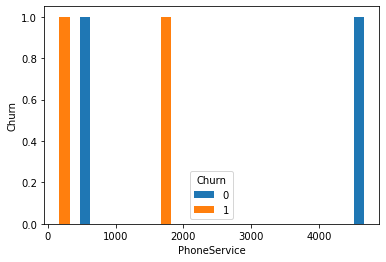

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
pd.crosstab(churn_df.PhoneService,churn_df.Churn).plot(kind='hist',bins=30)
plt.xlabel('PhoneService')
plt.ylabel('Churn')

In [29]:
churn_df.groupby('PhoneService')['Partner','Churn'].sum()

C:\Users\risha\AppData\Local\Temp/ipykernel_7604/2926306388.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  churn_df.groupby('PhoneService')['Partner','Churn'].sum()


,Partner,Churn
PhoneService,,
0,311,170
1,3091,1699


In [30]:
churn_df.groupby('PhoneService')['InternetService','Churn'].sum()

C:\Users\risha\AppData\Local\Temp/ipykernel_7604/843227992.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  churn_df.groupby('PhoneService')['InternetService','Churn'].sum()


,InternetService,Churn
PhoneService,,
0,682,170
1,4835,1699


In [31]:
churn_df.groupby('PhoneService')['Contract_Month-to-month','Contract_One year','Contract_Two year'].sum()

C:\Users\risha\AppData\Local\Temp/ipykernel_7604/2469213843.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  churn_df.groupby('PhoneService')['Contract_Month-to-month','Contract_One year','Contract_Two year'].sum()


,Contract_Month-to-month,Contract_One year,Contract_Two year
PhoneService,,,
0,376.0,145.0,161.0
1,3499.0,1328.0,1534.0


C:\Users\risha\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


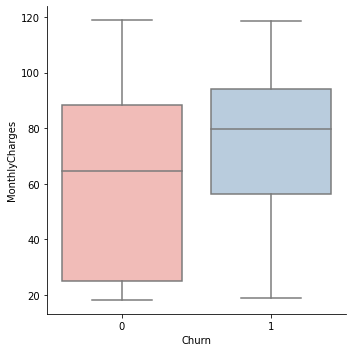

In [32]:
sns.factorplot(x='Churn', y = 'MonthlyCharges',data = churn_df, kind="box", palette = "Pastel1")

In [33]:
churn_df.shape

(7043, 26)

In [34]:
churn_df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,29.85,29.85,0,1,0,1,0,0,0,0,1,0
1,0,0,0,34,1,0,1,1,0,1,0,0,0,0,56.95,1889.50,0,0,1,0,1,0,0,0,0,1
2,0,0,0,2,1,0,1,1,1,0,0,0,0,1,53.85,108.15,1,0,1,1,0,0,0,0,0,1
3,0,0,0,45,0,0,1,1,0,1,1,0,0,0,42.30,1840.75,0,0,1,0,1,0,1,0,0,0
4,0,0,0,2,1,0,1,0,0,0,0,0,0,1,70.70,151.65,1,1,0,1,0,0,0,0,1,0


In [35]:
train_x=churn_df.drop(['Churn'],axis=1)
train_y=churn_df['Churn']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.3, random_state =1234)

In [36]:
import warnings
warnings.filterwarnings('ignore')


def build_model(model,X_train=X_train,
                X_test=X_test,
                y_train=y_train
                , y_test=y_test):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    Training_score=model.score(X_train,y_train)
    test_score=model.score(X_test,y_test)
    print("Training_score" , Training_score)
    print("Test_score" , test_score)
    print("Model Applied Successfuly")

from sklearn.linear_model import LogisticRegression
Classifier_lr=LogisticRegression()

build_model(Classifier_lr,X_train, X_test, y_train, y_test)

Training_score 0.8066937119675457
Test_score 0.7988641741599621
Model Applied Successfuly


In [37]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt=DecisionTreeClassifier(criterion='entropy',
                                    min_samples_split=5,min_samples_leaf=3,
                                    max_depth=5)
build_model(classifier_dt,X_train, X_test, y_train, y_test)

Training_score 0.8038539553752535
Test_score 0.7799337434926644
Model Applied Successfuly


In [38]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf=RandomForestClassifier(n_estimators=2000,criterion='gini',
                                        max_depth=5,
                                        min_samples_split=3,
                                        min_samples_leaf=2,)
build_model(classifier_rf,X_train, X_test, y_train, y_test)

Training_score 0.8054766734279919
Test_score 0.7927117841930904
Model Applied Successfuly


In [39]:
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,10):
    print("When K=",i)
    knn=KNeighborsClassifier(n_neighbors=i)
    build_model(knn,X_train, X_test, y_train, y_test)
    print("------------------")

When K= 1
Training_score 0.9979716024340771
Test_score 0.7165168007572172
Model Applied Successfuly
------------------
When K= 2
Training_score 0.860446247464503
Test_score 0.7595835305253195
Model Applied Successfuly
------------------
When K= 3
Training_score 0.8565922920892495
Test_score 0.7406530998580217
Model Applied Successfuly
------------------
When K= 4
Training_score 0.8332657200811359
Test_score 0.7662091812588736
Model Applied Successfuly
------------------
When K= 5
Training_score 0.8279918864097363
Test_score 0.7529578797917653
Model Applied Successfuly
------------------
When K= 6
Training_score 0.8208924949290061
Test_score 0.7699952673923331
Model Applied Successfuly
------------------
When K= 7
Training_score 0.8202839756592292
Test_score 0.7610033128253668
Model Applied Successfuly
------------------
When K= 8
Training_score 0.8188640973630832
Test_score 0.7728348319924279
Model Applied Successfuly
------------------
When K= 9
Training_score 0.8178498985801217
Test_

In [40]:
from sklearn.model_selection import GridSearchCV

param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

grid_search = GridSearchCV(classifier_rf, param_grid=param_grid, cv=5,n_jobs=-1)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=5, min_samples_leaf=2,
                                              min_samples_split=3,
                                              n_estimators=2000),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, None], 'max_features': [1, 3, 10],
                         'min_samples_split': [2, 3, 10]})

In [41]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
build_model(gnb, X_train, X_test, y_train, y_test)

Training_score 0.7387423935091277
Test_score 0.7240889730241363
Model Applied Successfuly


In [42]:
from sklearn import tree

dt = tree.DecisionTreeClassifier(max_depth=4)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [43]:
y_pred = dt.predict(X_test)

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1563
           1       0.62      0.47      0.53       550

    accuracy                           0.79      2113
   macro avg       0.72      0.68      0.70      2113
weighted avg       0.77      0.79      0.78      2113



[Text(167.4, 195.696, 'X[18] <= 0.5\ngini = 0.39\nsamples = 7043\nvalue = [5174, 1869]'),
 Text(83.7, 152.208, 'X[14] <= 93.675\ngini = 0.126\nsamples = 3168\nvalue = [2954, 214]'),
 Text(41.85, 108.72, 'X[19] <= 0.5\ngini = 0.076\nsamples = 2390\nvalue = [2295, 95]'),
 Text(20.925, 65.232, 'X[23] <= 0.5\ngini = 0.027\nsamples = 1315\nvalue = [1297, 18]'),
 Text(10.4625, 21.744, 'gini = 0.021\nsamples = 1233\nvalue = [1220, 13]'),
 Text(31.387500000000003, 21.744, 'gini = 0.115\nsamples = 82\nvalue = [77, 5]'),
 Text(62.775000000000006, 65.232, 'X[12] <= 0.5\ngini = 0.133\nsamples = 1075\nvalue = [998, 77]'),
 Text(52.3125, 21.744, 'gini = 0.089\nsamples = 774\nvalue = [738, 36]'),
 Text(73.2375, 21.744, 'gini = 0.235\nsamples = 301\nvalue = [260, 41]'),
 Text(125.55000000000001, 108.72, 'X[20] <= 0.5\ngini = 0.259\nsamples = 778\nvalue = [659, 119]'),
 Text(104.625, 65.232, 'X[12] <= 0.5\ngini = 0.347\nsamples = 398\nvalue = [309, 89]'),
 Text(94.16250000000001, 21.744, 'gini = 0.102\

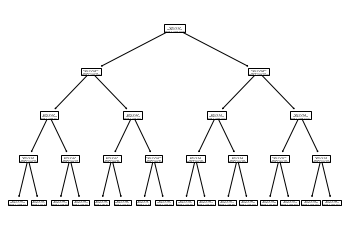

In [45]:
tree.plot_tree(dt.fit(train_x, train_y)) 

In [50]:
grid_search.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 3,
 'min_samples_split': 10}

In [52]:
grid_search.best_score_

0.8036511156186613